# Predicting Scores on the Depression Anxiety Stress Scales (DASS) From Responses to the Ten Item Personality Inventory (TIPI)
## This is an interesting look into the association between self-perceived personality and mental health

This dataset was taken from https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses


In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# Environment settings:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

# Reading and Cleaning DASS Data From Kaggle

In [38]:
# Load the data into a pandas dataframe
df = pd.read_csv('raw_data.csv', sep='\t')

In [39]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [40]:
# get a list of columns that are of object type
object_columns = df.select_dtypes(['object']).columns.tolist()
object_columns

['country', 'major']

# Feature Selection

## Creating  Depression, Anxiety, and Stress subscale scores
Based on the DASS 42 Score Sheet

In [41]:
df['Depression']=(df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+
                  df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+
                  df['Q26A']+df['Q31A']+df['Q34A']+df['Q37A']+
                  df['Q38A']+df['Q42A'])

In [42]:
df['Depression_SD'] = df[['Q3A','Q5A','Q10A','Q13A',
                          'Q16A','Q17A','Q21A','Q24A',
                          'Q26A','Q31A','Q34A','Q37A',
                          'Q38A','Q42A']].std(axis=1)

In [43]:
df['Anxiety']=(df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+
                  df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+
                  df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+
                  df['Q40A']+df['Q41A'])

In [44]:
df['Anxiety_SD'] = df[['Q2A','Q4A','Q7A','Q9A',
                          'Q15A','Q19A','Q20A','Q23A',
                          'Q25A','Q28A','Q30A','Q36A',
                          'Q40A','Q41A']].std(axis=1)

In [45]:
df['Stress']=(df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+
                  df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+
                  df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+
                  df['Q35A']+df['Q39A'])

In [46]:
df['Stress_SD'] = df[['Q1A','Q6A','Q8A','Q11A',
                          'Q12A','Q14A','Q18A','Q22A',
                          'Q27A','Q29A','Q32A','Q33A',
                          'Q35A','Q39A']].std(axis=1)

In [47]:
df['Total']=(df['Q3A']+df['Q5A']+df['Q10A']+df['Q13A']+
                  df['Q16A']+df['Q17A']+df['Q21A']+df['Q24A']+
                  df['Q26A']+df['Q31A']+df['Q34A']+df['Q37A']+
                  df['Q38A']+df['Q42A']+df['Q2A']+df['Q4A']+df['Q7A']+df['Q9A']+
                  df['Q15A']+df['Q19A']+df['Q20A']+df['Q23A']+
                  df['Q25A']+df['Q28A']+df['Q30A']+df['Q36A']+
                  df['Q40A']+df['Q41A']+df['Q1A']+df['Q6A']+df['Q8A']+df['Q11A']+
                  df['Q12A']+df['Q14A']+df['Q18A']+df['Q22A']+
                  df['Q27A']+df['Q29A']+df['Q32A']+df['Q33A']+
                  df['Q35A']+df['Q39A'])

In [48]:
df['Total_SD']=df[['Q3A','Q5A','Q10A','Q13A',
                          'Q16A','Q17A','Q21A','Q24A',
                          'Q26A','Q31A','Q34A','Q37A',
                          'Q38A','Q42A','Q2A','Q4A','Q7A','Q9A',
                          'Q15A','Q19A','Q20A','Q23A',
                          'Q25A','Q28A','Q30A','Q36A',
                          'Q40A','Q41A','Q1A','Q6A','Q8A','Q11A',
                          'Q12A','Q14A','Q18A','Q22A',
                          'Q27A','Q29A','Q32A','Q33A',
                          'Q35A','Q39A']].std(axis=1)

## Creating clinical interpretations of the scale scores
Based on the DASS 42 Score Sheet

### Depression

In [49]:
def dep_interpretation(score):
    if score <= 9:
        return 'Normal'
    elif score <= 13:
        return 'Mild Depression'
    elif score <= 20:
        return 'Moderate Depression'
    elif score <= 27:
        return 'Severe Depression'
    else:
        return 'Extremely Severe Depression'

In [50]:
df['Depression_Classification']=df['Depression'].apply(lambda score: dep_interpretation(score))

In [51]:
df['Depression_Classification'].value_counts()

,count
Depression_Classification,
Extremely Severe Depression,27133
Severe Depression,6569
Moderate Depression,6073


### Anxiety

In [52]:
def anx_interpretation(score):
    if score <= 7:
        return 'Normal'
    elif score <= 9:
        return 'Mild Anxiety'
    elif score <= 14:
        return 'Moderate Anxiety'
    elif score <= 19:
        return 'Severe Anxiety'
    else:
        return 'Extremely Severe Anxiety'

In [53]:
df['Anxiety_Classification']=df['Anxiety'].apply(lambda score: anx_interpretation(score))

In [54]:
df['Anxiety_Classification'].value_counts()

,count
Anxiety_Classification,
Extremely Severe Anxiety,32885
Severe Anxiety,5976
Moderate Anxiety,914


### Stress

In [55]:
def stress_interpretation(score):
    if score <= 14:
        return 'Normal'
    elif score <= 18:
        return 'Mild Stress'
    elif score <= 25:
        return 'Moderate Stress'
    elif score <= 33:
        return 'Severe Stress'
    else:
        return 'Extremely Severe Stress'

In [56]:
df['Stress_Classification']=df['Stress'].apply(lambda score: stress_interpretation(score))

In [57]:
df['Stress_Classification'].value_counts()

,count
Stress_Classification,
Extremely Severe Stress,21863
Severe Stress,9549
Moderate Stress,6125
Mild Stress,1927
Normal,311


## Calculating the total time, in milliseconds, to answer the questions for each scale

In [58]:
df['Depression_Time']=(df['Q3E']+df['Q5E']+df['Q10E']+df['Q13E']+
                  df['Q16E']+df['Q17E']+df['Q21E']+df['Q24E']+
                  df['Q26E']+df['Q31E']+df['Q34E']+df['Q37E']+
                  df['Q38E']+df['Q42E'])

In [59]:
df['Anxiety_Time']=(df['Q2E']+df['Q4E']+df['Q7E']+df['Q9E']+
                  df['Q15E']+df['Q19E']+df['Q20E']+df['Q23E']+
                  df['Q25E']+df['Q28E']+df['Q30E']+df['Q36E']+
                  df['Q40E']+df['Q41E'])

In [60]:
df['Stress_Time']=(df['Q1E']+df['Q6E']+df['Q8E']+df['Q11E']+
                  df['Q12E']+df['Q14E']+df['Q18E']+df['Q22E']+
                  df['Q27E']+df['Q29E']+df['Q32E']+df['Q33E']+
                  df['Q35E']+df['Q39E'])

In [61]:
df['Total_Time']=(df['Q3E']+df['Q5E']+df['Q10E']+df['Q13E']+
                  df['Q16E']+df['Q17E']+df['Q21E']+df['Q24E']+
                  df['Q26E']+df['Q31E']+df['Q34E']+df['Q37E']+
                  df['Q38E']+df['Q42E']+df['Q2E']+df['Q4E']+df['Q7E']+df['Q9E']+
                  df['Q15E']+df['Q19E']+df['Q20E']+df['Q23E']+
                  df['Q25E']+df['Q28E']+df['Q30E']+df['Q36E']+
                  df['Q40E']+df['Q41E']+df['Q1E']+df['Q6E']+df['Q8E']+df['Q11E']+
                  df['Q12E']+df['Q14E']+df['Q18E']+df['Q22E']+
                  df['Q27E']+df['Q29E']+df['Q32E']+df['Q33E']+
                  df['Q35E']+df['Q39E'])

## Validity Check
- Sum of the scores from VCL6, VCL9, and VCL12, which are not real words and should have a value of 0
- The higher the value of the validity check, the less likely the rest of the participants responses are valid
- From the Code Book

In [63]:
df['Validity_Check']=(df['VCL6']+df['VCL9']+df['VCL12'])

In [64]:
df['Validity_Check'].value_counts()

,count
Validity_Check,
0,34583
1,4044
2,822
3,326


### creating dummy coded variables that tell if an individual falls under the 'severe' category

In [66]:
# Depression
X3 = df[['Q11A','Q39A',
       'Q5A','Q11A','TIPI4','TIPI9','gender','voted']]

def assign_d_severe(df):
    df['d_severe'] = 0
    df.loc[df['Depression'] > 20, 'd_severe'] = 1

assign_d_severe(df)

# Anxiety
def assign_a_severe(df):
    df['a_severe'] = 0
    df.loc[df['Anxiety'] > 14, 'a_severe'] = 1

assign_a_severe(df)

# Stress
def assign_s_severe(df):
    df['s_severe'] = 0
    df.loc[df['Stress'] > 25, 's_severe'] = 1

assign_s_severe(df)

# Depression, Anxiety or Stress
def assign_severe(df):
    df['severe'] = 0
    df.loc[(df['d_severe'] == 1) | (df['a_severe'] == 1) | (df['s_severe'] == 1), 'severe'] = 1

assign_severe(df)

# Data Visualization

## Stress

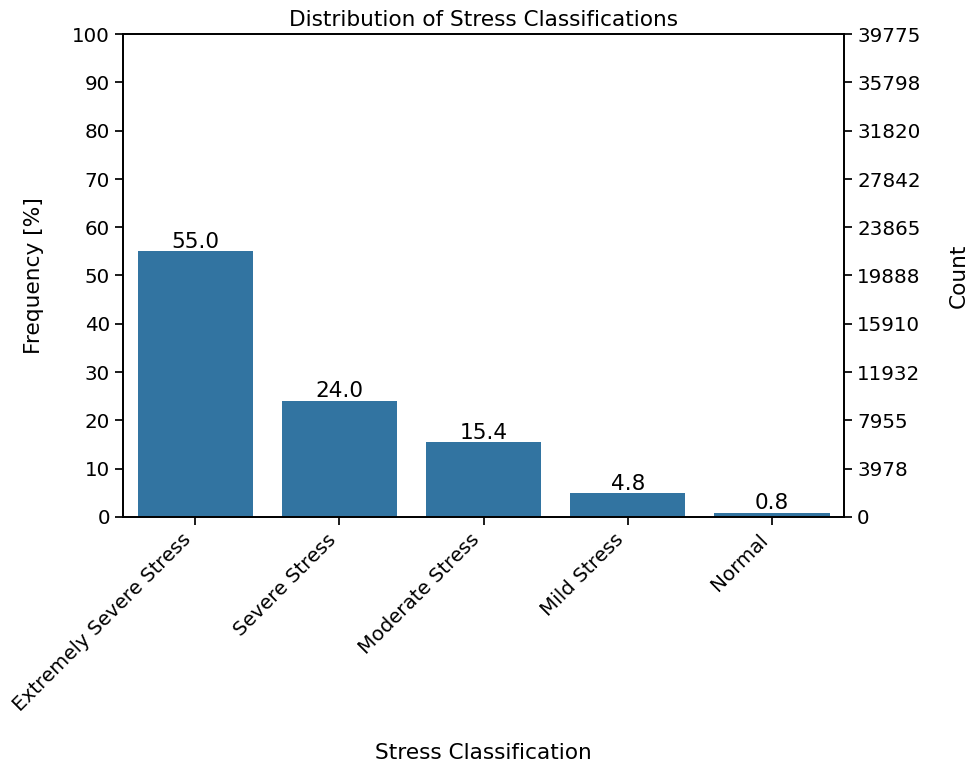

In [67]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Stress_Classification = sns.countplot(x='Stress_Classification', data=df, order=['Extremely Severe Stress','Severe Stress','Moderate Stress','Mild Stress','Normal'])
plt.title('Distribution of Stress Classifications')
plt.xlabel('Stress Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Stress_Classification2=Stress_Classification.twinx()

# Switch so count axis is on right, frequency on left
Stress_Classification2.yaxis.tick_left()
Stress_Classification.yaxis.tick_right()

# Also switch the labels over
Stress_Classification.yaxis.set_label_position('right')
Stress_Classification.set_ylabel('Count',labelpad=20)
Stress_Classification2.yaxis.set_label_position('left')
Stress_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Stress_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Stress_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Stress_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
Stress_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Stress_Classification2.set_ylim(0,100)
Stress_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Stress_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

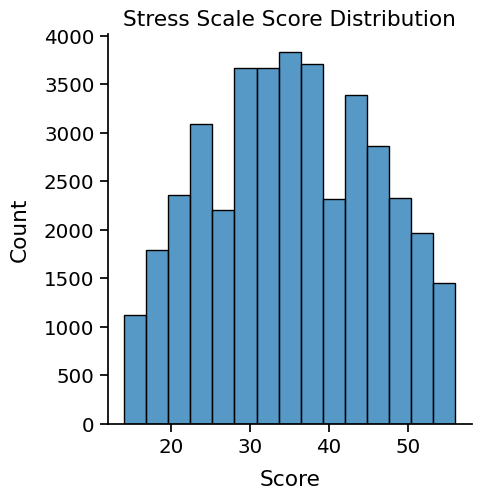

In [68]:
sns.displot(df['Stress'],bins=15)
plt.title('Stress Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

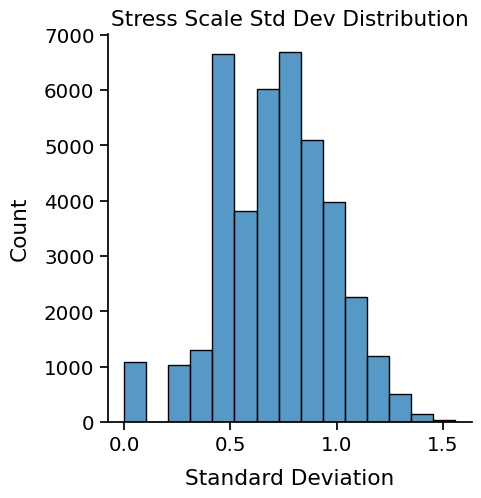

In [69]:
sns.displot(df['Stress_SD'],bins=15)
plt.title('Stress Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

## Viewing all of the features that have a correlation of more than 0.1 with Stress Scale Score

In [70]:
cor = df.corr(numeric_only=True)
cor_target = abs(cor["Stress"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

,Stress
Q1A,0.766232
Q2A,0.420764
Q3A,0.599767
Q4A,0.541323
Q5A,0.610471
Q6A,0.726928
Q7A,0.545242
Q8A,0.729494
Q9A,0.626502
Q10A,0.564976


## Depression

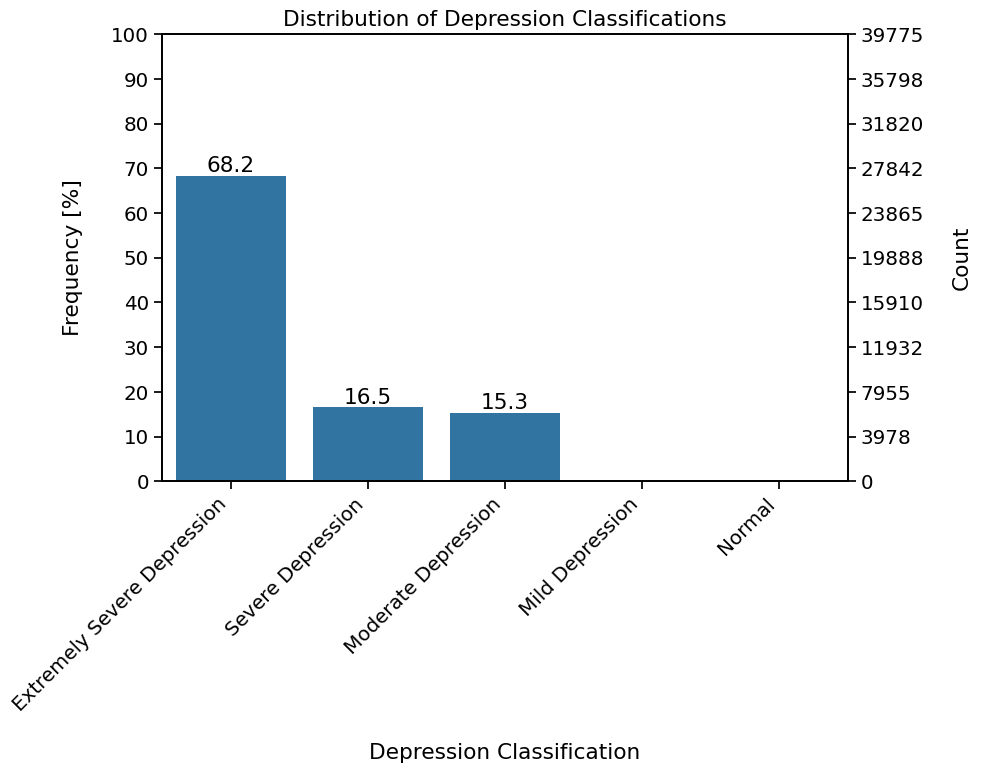

In [71]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Depression_Classification = sns.countplot(x='Depression_Classification', data=df, order=['Extremely Severe Depression','Severe Depression','Moderate Depression','Mild Depression','Normal'])
plt.title('Distribution of Depression Classifications')
plt.xlabel('Depression Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Depression_Classification2=Depression_Classification.twinx()

# Switch so count axis is on right, frequency on left
Depression_Classification2.yaxis.tick_left()
Depression_Classification.yaxis.tick_right()

# Also switch the labels over
Depression_Classification.yaxis.set_label_position('right')
Depression_Classification.set_ylabel('Count',labelpad=20)
Depression_Classification2.yaxis.set_label_position('left')
Depression_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Depression_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Depression_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Depression_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
Depression_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Depression_Classification2.set_ylim(0,100)
Depression_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Depression_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

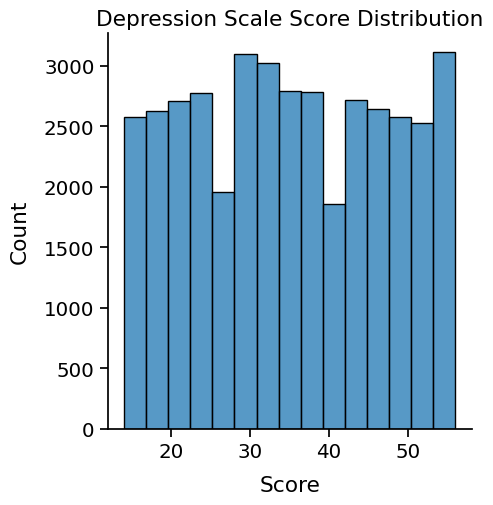

In [72]:
sns.displot(df['Depression'],bins=15)
plt.title('Depression Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

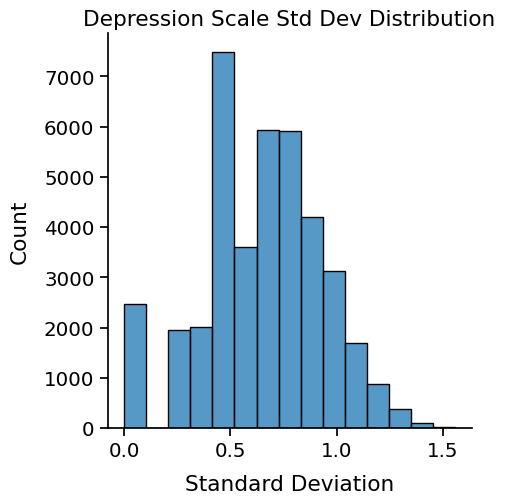

In [73]:
sns.displot(df['Depression_SD'],bins=15)
plt.title('Depression Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

## Anxiety

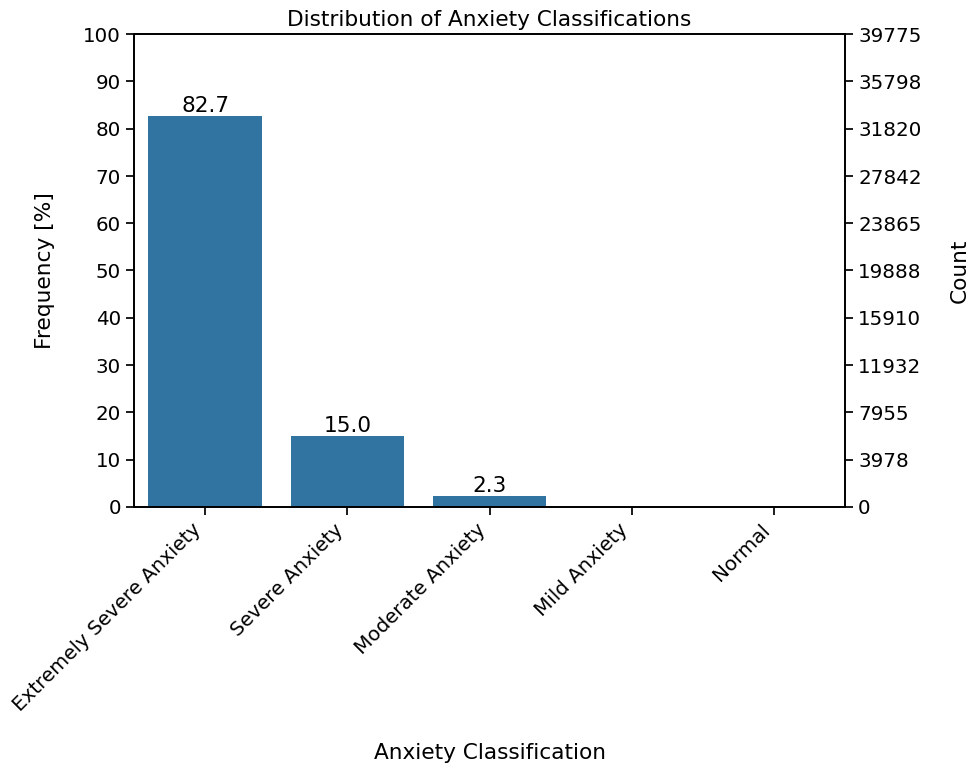

In [75]:
ncount = len(df)
sns.set_context('notebook',font_scale=1.3)
plt.figure(figsize=(10,8))
Anxiety_Classification = sns.countplot(x='Anxiety_Classification', data=df, order=['Extremely Severe Anxiety','Severe Anxiety','Moderate Anxiety','Mild Anxiety','Normal'])
plt.title('Distribution of Anxiety Classifications')
plt.xlabel('Anxiety Classification',labelpad=20)
plt.xticks(rotation=45, ha='right')

# Make twin axis
Anxiety_Classification2=Anxiety_Classification.twinx()

# Switch so count axis is on right, frequency on left
Anxiety_Classification2.yaxis.tick_left()
Anxiety_Classification.yaxis.tick_right()

# Also switch the labels over
Anxiety_Classification.yaxis.set_label_position('right')
Anxiety_Classification.set_ylabel('Count',labelpad=20)
Anxiety_Classification2.yaxis.set_label_position('left')
Anxiety_Classification2.set_ylabel('Frequency [%]',labelpad=20)

# Use a LinearLocator to ensure the correct number of ticks
Anxiety_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))
for p in Anxiety_Classification.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    Anxiety_Classification.annotate('{:.1f}'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
Anxiety_Classification.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100

Anxiety_Classification2.set_ylim(0,100)
Anxiety_Classification.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
Anxiety_Classification2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()

Text(-1.1555555555555497, 0.5, 'Count')

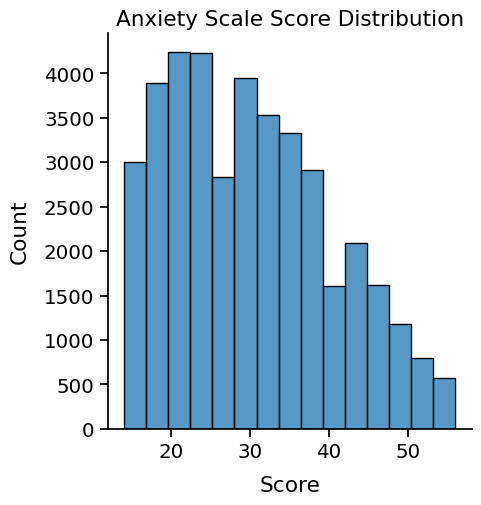

In [76]:
sns.displot(df['Anxiety'],bins=15)
plt.title('Anxiety Scale Score Distribution')
plt.xlabel('Score',labelpad=10)
plt.ylabel('Count',labelpad=10)

Text(-1.1555555555555497, 0.5, 'Count')

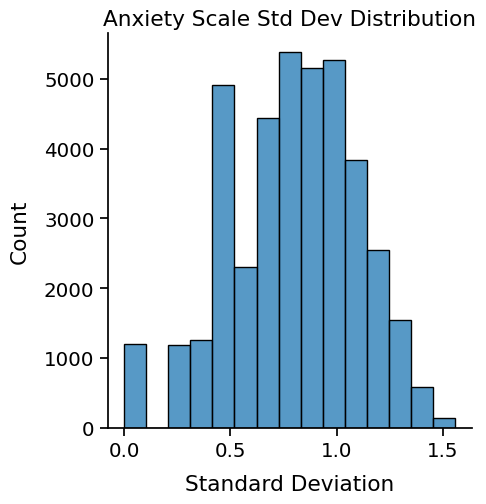

In [77]:
sns.displot(df['Anxiety_SD'],bins=15)
plt.title('Anxiety Scale Std Dev Distribution')
plt.xlabel('Standard Deviation',labelpad=10)
plt.ylabel('Count',labelpad=10)

# Linear Regression Model - Predicting Stress Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

## Identify input features
All the items from the TIPI

In [78]:
# feature specification
X = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

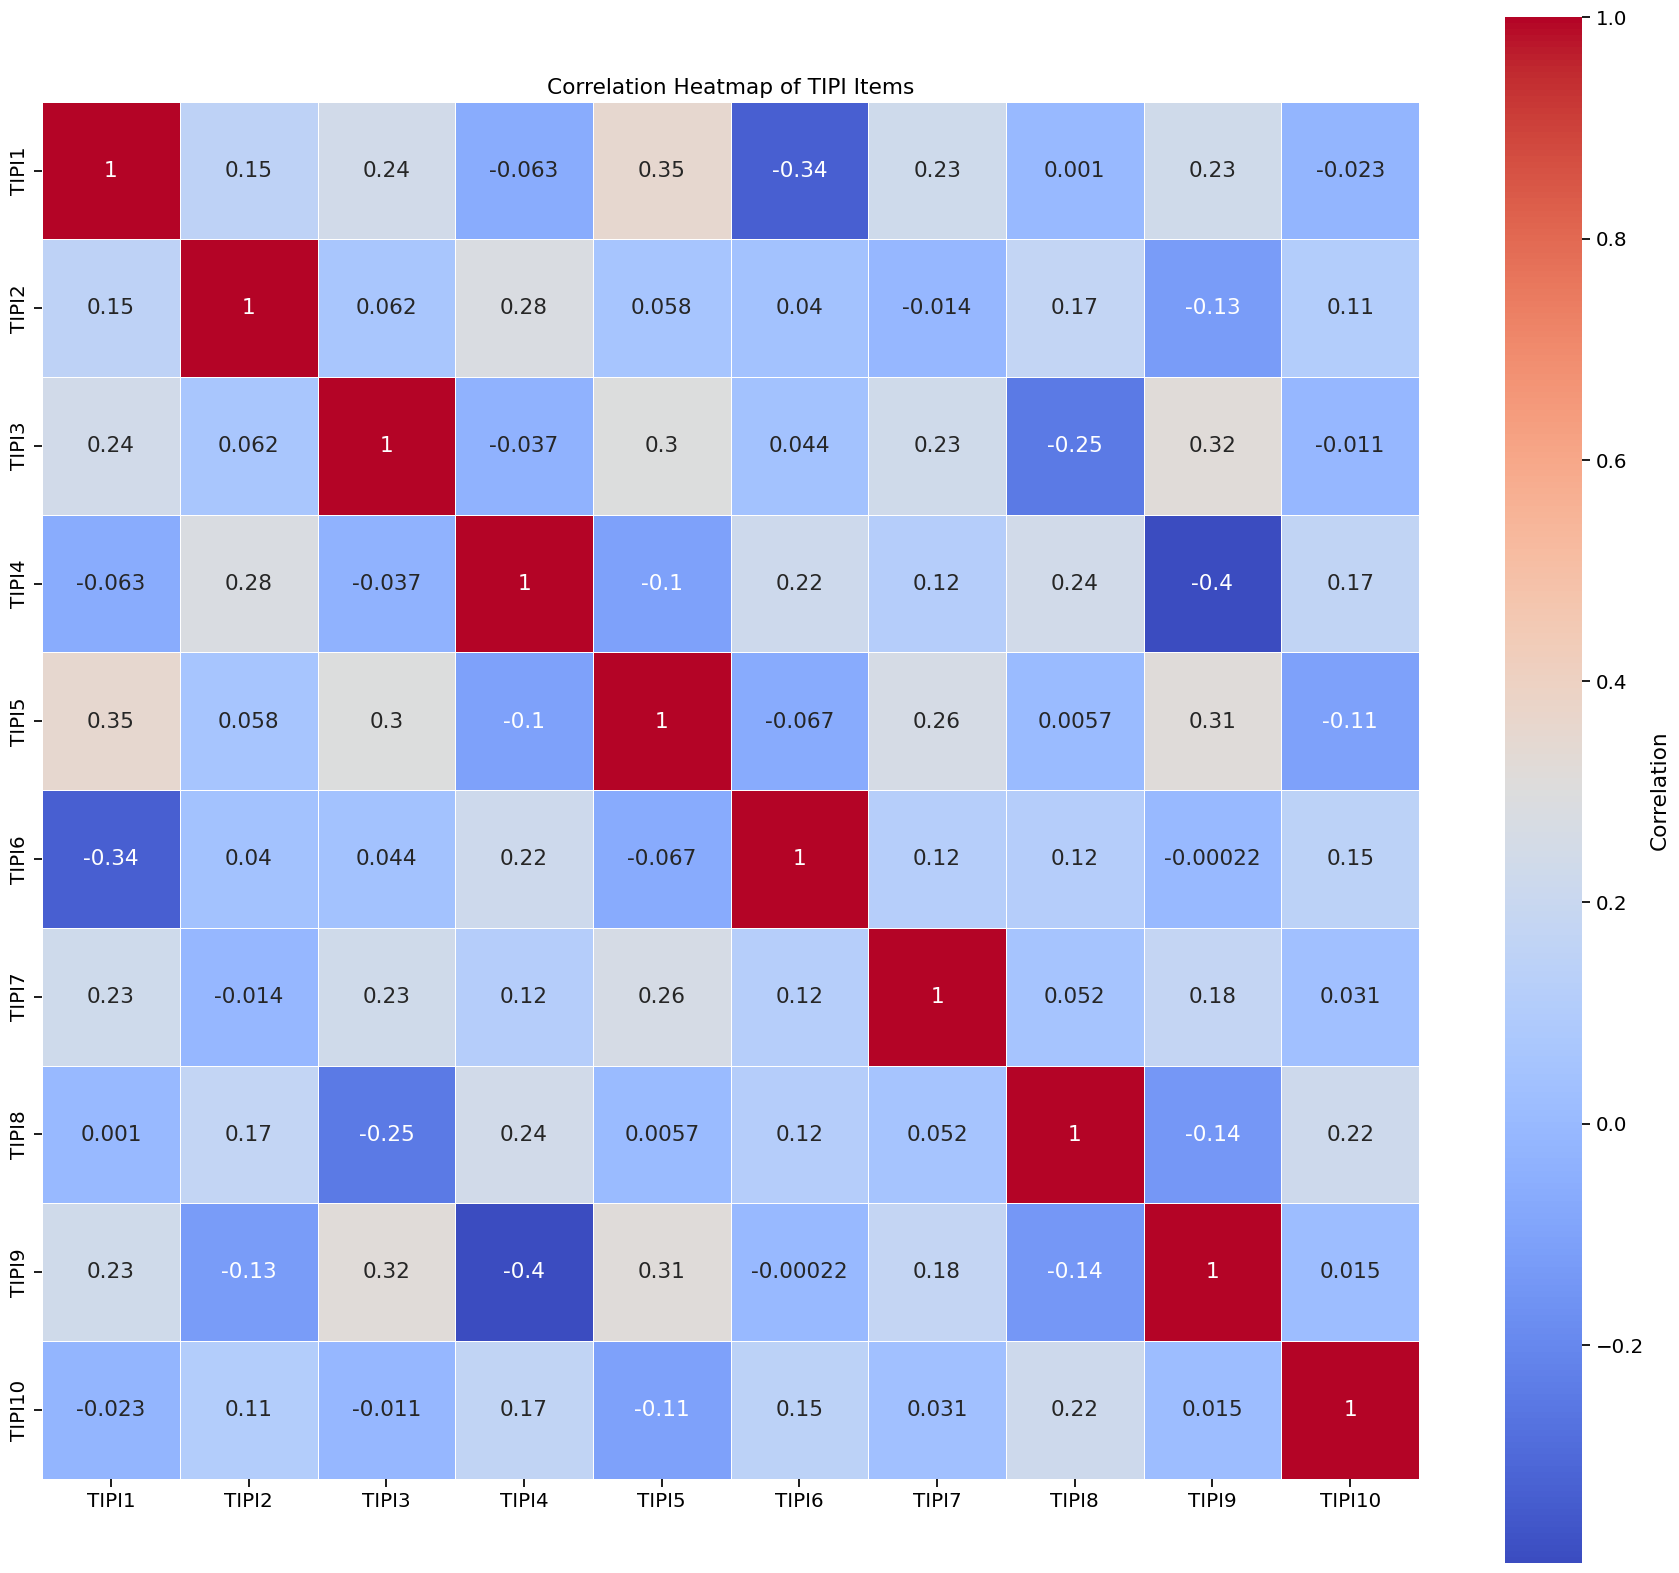

In [123]:
# Checking for multicollinearity

# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap of TIPI Items")
plt.tight_layout()
plt.show()

No problematic degrees of correlation between features -  they can all be included

In [79]:
# output specification
y = df['Stress']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
# import the model
from sklearn.linear_model import LinearRegression

In [83]:
# specify the model
lm = LinearRegression()

In [84]:
# run the model on the training data
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
# view the intercept of the model
lm.intercept_

np.float64(28.213704954644616)

In [86]:
# view the coefficients of the model features
lm.coef_

array([-0.20120488,  0.57763092, -0.06543236,  2.26853262, -0.37633106,
        0.15999947,  0.03600098,  0.26260932, -1.7155517 , -0.02379152])

In [87]:
X_train.columns

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10'],
      dtype='object')

In [88]:
cdf = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])
cdf

,Coeff
TIPI1,-0.201205
TIPI2,0.577631
TIPI3,-0.065432
TIPI4,2.268533
TIPI5,-0.376331
TIPI6,0.159999
TIPI7,0.036001
TIPI8,0.262609
TIPI9,-1.715552
TIPI10,-0.023792


## Predictions

In [89]:
# Generate predictions by running the model with the test data
predictions = lm.predict(X_test)

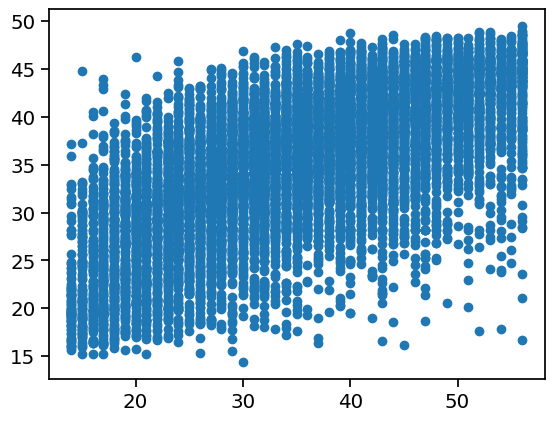

In [90]:
# visualize predictions using a scatter plot
plt.scatter(y_test,predictions)

Text(0.5, 17.84444444444445, 'Residual Values')

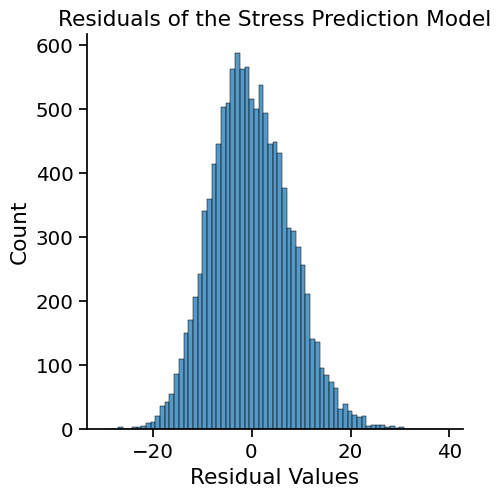

In [91]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y_test-predictions))
plt.title('Residuals of the Stress Prediction Model')
plt.xlabel('Residual Values')

The normal distribution of the residuals indicates that linear regression was an appropriate model choice

## Regression evaluation metrics

In [92]:
from sklearn import metrics

In [93]:
metrics.mean_absolute_error(y_test,predictions)

6.355048867810325

In [94]:
metrics.mean_squared_error(y_test,predictions)

62.84781383959285

In [95]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

np.float64(7.927661309591427)

## An individual's score on the TIPI is able to predict, on average, within 6.3 points, an individual's score on the Stress Scale of the DASS

# Linear Regression Model - Predicting Depression Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

In [96]:
# feature specification
X1 = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

In [97]:
y1 = df['Depression']

In [98]:
# train/test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [99]:
# specify the model
lm1 = LinearRegression()
# run the model on the training data
lm1.fit(X1_train,y1_train)

LinearRegression()

In [100]:
# view the intercept of the model
lm1.intercept_

np.float64(33.21851095375027)

In [101]:
# view the coefficients of the model features
lm1.coef_

array([-0.70434572,  0.36724171, -0.44452884,  1.36649042, -0.34903009,
        0.74536656, -0.01527999,  0.64725835, -2.00900383,  0.19717905])

In [102]:
cdf1 = pd.DataFrame(lm1.coef_,X1_train.columns,columns=['Coeff'])
cdf1

,Coeff
TIPI1,-0.704346
TIPI2,0.367242
TIPI3,-0.444529
TIPI4,1.366490
TIPI5,-0.349030
TIPI6,0.745367
TIPI7,-0.015280
TIPI8,0.647258
TIPI9,-2.009004
TIPI10,0.197179


## Predictions

In [103]:
# Generate predictions by running the model with the test data
predictions1 = lm1.predict(X1_test)

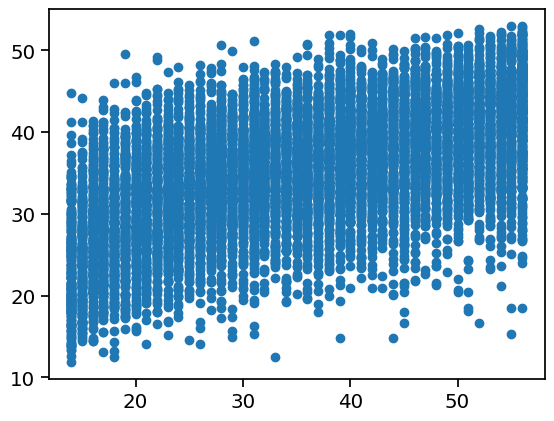

In [104]:
# visualize predictions using a scatter plot
plt.scatter(y1_test,predictions1)

Text(0.5, 17.84444444444445, 'Residual Values')

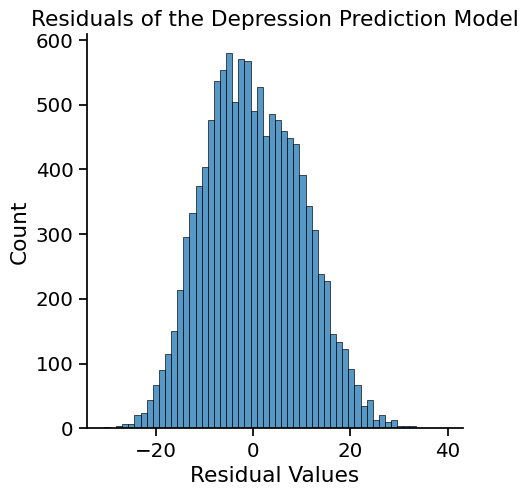

In [105]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y1_test-predictions1))
plt.title('Residuals of the Depression Prediction Model')
plt.xlabel('Residual Values')

In [106]:
metrics.mean_absolute_error(y1_test,predictions1)

8.155728689410484

In [107]:
metrics.mean_squared_error(y1_test,predictions1)

98.57784389912283

In [108]:
np.sqrt(metrics.mean_squared_error(y1_test,predictions1))

np.float64(9.928637565100402)

## An individual's score on the TIPI is able to predict, on average, within 9 points, an individual's score on the Depression Scale of the DASS

# Linear Regression Model - Predicting Anxiety Score on the DASS Based on Responses to The Ten Item Personality Inventory
Gosling, S. D., Rentfrow, P. J., & Swann, W. B., Jr. (2003). A Very Brief Measure of the Big Five Personality Domains. Journal of Research in Personality, 37, 504-528.

In [109]:
# feature specification
X2 = df[['TIPI1','TIPI2','TIPI3',
        'TIPI4','TIPI5','TIPI6',
        'TIPI7','TIPI8','TIPI9',
        'TIPI10']]

In [110]:
y2 = df['Anxiety']

In [111]:
# train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [112]:
# specify the model
lm2 = LinearRegression()
# run the model on the training data
lm2.fit(X2_train,y2_train)

LinearRegression()

In [113]:
# view the intercept of the model
lm2.intercept_

np.float64(23.936903571551248)

In [114]:
# view the coefficients of the model features
lm2.coef_

array([-0.11642756,  0.12696117, -0.16317441,  1.8961846 , -0.5436123 ,
        0.3336907 ,  0.137404  ,  0.41011129, -1.2529433 ,  0.04911402])

In [115]:
cdf2 = pd.DataFrame(lm2.coef_,X2_train.columns,columns=['Coeff'])
cdf2

,Coeff
TIPI1,-0.116428
TIPI2,0.126961
TIPI3,-0.163174
TIPI4,1.896185
TIPI5,-0.543612
TIPI6,0.333691
TIPI7,0.137404
TIPI8,0.410111
TIPI9,-1.252943
TIPI10,0.049114


In [116]:
# Generate predictions by running the model with the test data
predictions2 = lm2.predict(X2_test)

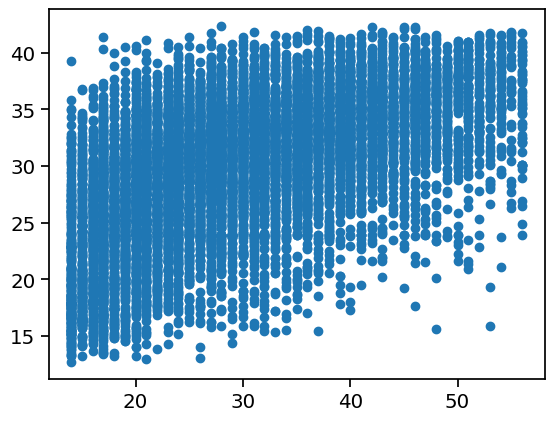

In [117]:
# visualize predictions using a scatter plot
plt.scatter(y2_test,predictions2)

Text(0.5, 17.84444444444445, 'Residual Values')

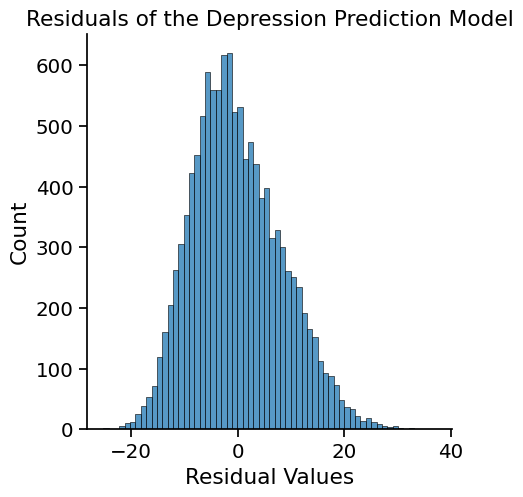

In [118]:
# create histogram of the distribution of the residuals
## the residuals are the difference between the actual test values and the predicted values
sns.displot((y2_test-predictions2))
plt.title('Residuals of the Depression Prediction Model')
plt.xlabel('Residual Values')

In [119]:
metrics.mean_absolute_error(y2_test,predictions2)

6.818934975502305

In [120]:
metrics.mean_squared_error(y2_test,predictions2)

71.52257091770642

In [121]:
np.sqrt(metrics.mean_squared_error(y2_test,predictions2))

np.float64(8.457101803674023)

## An individual's score on the TIPI is able to predict, on average, within 6.8 points, an individual's score on the Anxiety Scale of the DASS